In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Step 1 : Sample dataset
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2]
])

In [3]:
df = pd.DataFrame(data, columns=["X","Y","Z"])

In [4]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [5]:
#Setp 2: Standardization using pandas (avoid NaN issues)
standardized_data = (df - df.mean()) / df.std()

In [7]:
#Step 3: Covariance matrix
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.92592927, 0.93688744],
       [0.92592927, 1.        , 0.98192228],
       [0.93688744, 0.98192228, 1.        ]])

In [9]:
#Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vecs)

[2.89670115 0.08582574 0.01747311]
[[ 0.57041595  0.81767389 -0.07768556]
 [ 0.57969966 -0.46779003 -0.66717374]
 [ 0.58187108 -0.33553224  0.74084017]]


In [17]:
#Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

In [13]:
#Step 6: Select top 2 eigenvectors
eig_vecs_subset = sorted_eig_vecs[:, :2]

In [14]:
#Step 7:Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1","PC2"])

In [15]:
#Step 8 : Output the reduced data
print("\nReduced Data(after PCA) : \n",reduced_df)


Reduced Data(after PCA) : 
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


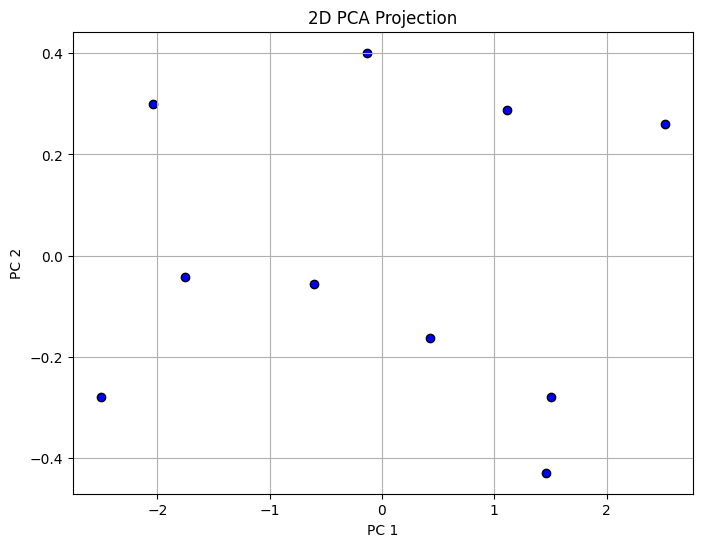

In [18]:
#Step 9: Visualize
plt.figure(figsize=(8,6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], c="blue", edgecolors= 'k')
plt.title("2D PCA Projection")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()